<a href="https://colab.research.google.com/github/hikiofni/Backtest/blob/main/SHIBA_EMA_%2B_stochRSI_%2B_TRIX_1HOUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-binance

     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 1.3 MB 39.2 MB/s 
     |████████████████████████████████| 288 kB 50.2 MB/s 
     |████████████████████████████████| 214 kB 52.0 MB/s 
     |████████████████████████████████| 103 kB 62.0 MB/s 
     |████████████████████████████████| 160 kB 54.7 MB/s 
     |████████████████████████████████| 271 kB 50.2 MB/s 


In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=2b8f3d88aa1f9d8d8a9a116603989248506b9ad74a1fb05dc51eb3d50584ca1c
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


<h1>Import Dataset</h1>

In [ ]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np

client = Client()

klinesT = client.get_historical_klines("SHIBUSDT", Client.KLINE_INTERVAL_1HOUR, "5 july 2021")

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

                         open      high       low     close           volume
timestamp                                                                   
2021-07-05 00:00:00  0.000009  0.000009  0.000009  0.000009  768684496583.00
2021-07-05 01:00:00  0.000009  0.000009  0.000008  0.000009  499392763076.00
2021-07-05 02:00:00  0.000009  0.000009  0.000008  0.000009  387088522257.00
2021-07-05 03:00:00  0.000009  0.000009  0.000009  0.000009  346952526488.00
2021-07-05 04:00:00  0.000009  0.000009  0.000008  0.000008  764512679053.00
...                       ...       ...       ...       ...              ...
2021-10-31 04:00:00  0.000066  0.000068  0.000065  0.000067  929822910809.00
2021-10-31 05:00:00  0.000067  0.000068  0.000066  0.000066  663190017377.00
2021-10-31 06:00:00  0.000066  0.000067  0.000065  0.000067  900571224830.00
2021-10-31 07:00:00  0.000067  0.000068  0.000065  0.000065  708692273640.00
2021-10-31 08:00:00  0.000065  0.000066  0.000064  0.000064  973819559000.00

<h1>Backtest Execution</h1>

Create Indicators

In [ ]:
dfTest = df['2021-09-17':'2021-10-31']

# dfTest['histo_macd']=ta.trend.macd_diff(dfTest['close'], 26, 12, 9)
dfTest['EMA28']=ta.trend.ema_indicator(dfTest['close'], 28)
dfTest['EMA48']=ta.trend.ema_indicator(dfTest['close'], 45)
trixLength = 9
trixSignal = 21
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']
# dfTest['MACD']=ta.trend.macd(dfTest['close'], 26, 12, 9)
# dfTest['MACD_SIGNAL']=ta.trend.macd_signal(dfTest['close'], 26, 12, 9)
# dfTest['MACD_HISTO']= dfTest['MACD'] - dfTest['MACD_SIGNAL']
# dfTest['EMA8']=ta.trend.ema_indicator(dfTest['close'], 8)
# dfTest['EMA14']=ta.trend.ema_indicator(dfTest['close'], 14)
# dfTest['EMA50']=ta.trend.ema_indicator(dfTest['close'], 50)
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'], window=14)
# dfTest['MEAN_STOCH_RSI'] = ta.trend.sma_indicator(dfTest['STOCH_RSI'], 3)
# dfTest['SIGNAL_MEAN_STOCH_RSI'] = ta.trend.sma_indicator(dfTest['MEAN_STOCH_RSI'], 3)
dfTest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,open,high,low,close,volume,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,EMA28,EMA48,STOCH_RSI
timestamp,,,,,,,,,,,,
2021-09-17 00:00:00,0.000009,0.000009,0.000008,0.000008,3505419169664.00,0.000007,1.386481,0.302179,1.084302,NaN,NaN,NaN
2021-09-17 01:00:00,0.000008,0.000009,0.000008,0.000009,2444032493712.00,0.000007,1.425861,0.370238,1.055623,NaN,NaN,NaN
2021-09-17 02:00:00,0.000009,0.000009,0.000009,0.000009,5452136629623.00,0.000007,1.493357,0.441833,1.051524,NaN,NaN,NaN
2021-09-17 03:00:00,0.000009,0.000009,0.000009,0.000009,6466477821861.00,0.000008,1.550959,0.516223,1.034736,NaN,NaN,NaN
2021-09-17 04:00:00,0.000009,0.000009,0.000009,0.000009,3138458926301.00,0.000008,1.592556,0.592607,0.999949,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 04:00:00,0.000066,0.000068,0.000065,0.000067,929822910809.00,0.000070,-0.554808,-0.237580,-0.317229,0.000069,0.000070,0.670231
2021-10-31 05:00:00,0.000067,0.000068,0.000066,0.000066,663190017377.00,0.000069,-0.533493,-0.273315,-0.260179,0.000069,0.000069,0.536448
2021-10-31 06:00:00,0.000066,0.000067,0.000065,0.000067,900571224830.00,0.000069,-0.492318,-0.305284,-0.187034,0.000069,0.000069,0.863077


Make backtest

Period : [2021-09-17 00:00:00] -> [2021-10-31 08:00:00]
Starting balance : 1000 $
Final balance : 8643.15 $
Performance vs US Dollar : 764.31 %
Buy and Hold Performence : 677.58 %
Performance vs Buy and Hold : 12.8 %
Number of negative trades :  2
Number of positive trades :  3
Average Positive Trades :  141.02 %
Average Negative Trades :  -2.54 %
Best trade +289.57 %, the  2021-10-14 17:00:00
Worst trade -3.93 %, the  2021-09-24 14:00:00
Worst drawBack -5.0 %
Total fee :  464835.71 $
Trades win rate ratio : 60.0 %
PLOT


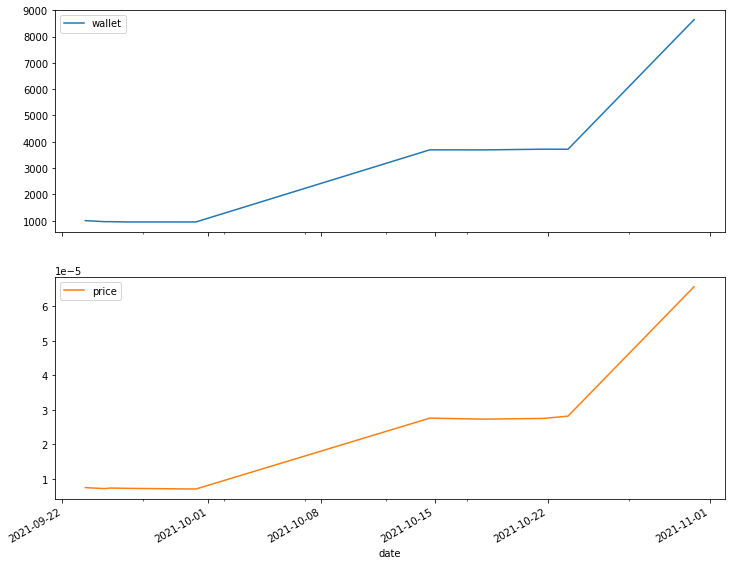

In [ ]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

for index, row in dfTest.iterrows():
  #Buy
  if row['TRIX_HISTO'] > 0 and row['EMA28'] > row['EMA48'] and row['STOCH_RSI'] < 0.85 and  usdt > 0:
    coin = usdt / row['close']
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",df['close'][index],'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)

  #Sell
  if row['TRIX_HISTO'] < 0 and row['EMA28'] < row['EMA48'] and row['STOCH_RSI'] > 0.2 and coin > 0:
    usdt = coin * row['close']
    frais = fee * usdt
    usdt = usdt - frais
    coin = 0
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at",df['close'][index],'$ the', index)
    myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  lastIndex = index

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'
totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100
totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")

print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")
print("Trades win rate ratio :", round(winRateRatio, 2), "%")
dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')

<h1>Backtest Result</h1>